<h1 id="aa" align="center" style="color:white;background:#8B0000;padding:18px;border-radius:15px 50px; font-family:newtimeroman;"> КЛАССИФИКАЦИЯ СУПЕРГЕРОЕВ </h1>
<h1 id="bb" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Вступление </h1>
В этой работе мы предпринимаем попытку классифицировать супергероев на основе их характеристик. Для этого мы будем использовать методы машинного обучения, чтобы предсказать моральную ориентацию персонажей (добро, зло или нейтралитет).

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Цели классификации </h1>
<ul> <li> **Разработка модели** для предсказания моральной ориентации супергероев.</li> <li> **Сравнение алгоритмов** классификации (логистическая регрессия, деревья решений, случайный лес).</li> <li> **Оценка качества** моделей с помощью метрик точности и F1-меры.</li> <li> **Интерпретация результатов** для понимания факторов, влияющих на моральную ориентацию.</li> </ul>
<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Описание набора данных </h1>
Набор данных содержит информацию о супергероях, включая их физические и бойцовские характеристики, биографические данные и социальные связи. Ключевые признаки:

intelligence: Уровень интеллекта персонажа.

strength: Физическая сила персонажа.

speed: Скорость, с которой персонаж может двигаться.

durability: Устойчивость персонажа к повреждениям.

power: Общая сила или способности персонажа.

combat: Боевые навыки и опыт персонажа.

alignment: Моральная ориентация персонажа (добро, зло или нейтралитет).

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Подготовка данных </h1>
Преобразование категориальных признаков: Преобразование нечисловых признаков в числовые.

Масштабирование данных: Нормализация признаков для равного веса в модели.

Разделение данных: Разделение на обучающую и тестовую выборки.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Методы классификации </h1>
<table style="border-collapse: collapse; width: 100%; margin: 20px 0;"> <tr> <th style="border: 2px solid #B00000; padding: 10px;">Алгоритм</th> <th style="border: 2px solid #B00000; padding: 10px;">Параметры</th> <th style="border: 2px solid #B00000; padding: 10px;">Плюсы</th> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Логистическая регрессия</td> <td style="border: 1px solid #B00000; padding: 8px;">max_iter=1000</td> <td style="border: 1px solid #B00000; padding: 8px;">Простая интерпретация</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Деревья решений</td> <td style="border: 1px solid #B00000; padding: 8px;">max_depth=5</td> <td style="border: 1px solid #B00000; padding: 8px;">Легкая интерпретация</td> </tr> <tr> <td style="border: 1px solid #B00000; padding: 8px;">Случайный лес</td> <td style="border: 1px solid #B00000; padding: 8px;">n_estimators=100</td> <td style="border: 1px solid #B00000; padding: 8px;">Высокая точность</td> </tr> </table>
<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Оценка качества </h1>
Точность: Доля правильно классифицированных экземпляров.

F1-мера: Баланс между точностью и полнотой.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Выводы </h1>
Классификация супергероев по их характеристикам позволяет глубже понять факторы, влияющие на их моральную ориентацию. Сравнение алгоритмов поможет выбрать наиболее эффективный подход для решения этой задачи.

### *Импорт библиотек для работы с дата-сетом* 

In [1101]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1102]:
df = pd.read_csv('superheroes_data.csv')

In [1103]:
df.head()

,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,race,height,weight,eye-color,hair-color,occupation,base,group-affiliation,relatives,url
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,Human,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Yellow,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,Icthyo Sapien,"[""6'3"", '191 cm']","['145 lb', '65 kg']",Blue,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,...,Ungaran,"[""6'1"", '185 cm']","['200 lb', '90 kg']",Blue,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,Human / Radiation,"[""6'8"", '203 cm']","['980 lb', '441 kg']",Green,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,Cosmic Entity,"['-', '0 cm']","['- lb', '0 kg']",Blue,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...


In [1104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 731 non-null    int64  
 1   name               731 non-null    object 
 2   intelligence       566 non-null    float64
 3   strength           629 non-null    float64
 4   speed              566 non-null    float64
 5   durability         566 non-null    float64
 6   power              566 non-null    float64
 7   combat             566 non-null    float64
 8   full-name          630 non-null    object 
 9   alter-egos         731 non-null    object 
 10  aliases            731 non-null    object 
 11  place-of-birth     731 non-null    object 
 12  first-appearance   731 non-null    object 
 13  publisher          716 non-null    object 
 14  alignment          731 non-null    object 
 15  gender             731 non-null    object 
 16  race               429 non

## Типы данных:

## Числовые столбцы: 
## id, intelligence, strength, speed, durability, power, combat.

## Категориальные столбцы: 
## name, full-name, alter-egos, aliases, place-of-birth, first-appearance, publisher, alignment, gender, race, height, weight, eye-color, hair-color, occupation, base, group-affiliation, relatives, url.

## Пропуски данных:

## Числовые столбцы: Некоторые столбцы (intelligence, speed, durability, power, combat) имеют пропуски (от 566 до 629 непустых значений).

## Категориальные столбцы: Большинство категориальных столбцов имеют полные данные, но race имеет только 429 непустых значений.

In [1105]:
df.shape

(731, 26)

##  Количество записей и столбцов: Датафрейм содержит 731 запись и 26 столбцов.

In [1106]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
name,731,712,Spider-Man,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intelligence,566.0,NaN,NaN,NaN,64.44523,19.989369,6.0,50.0,63.0,75.0,100.0
strength,629.0,NaN,NaN,NaN,44.00159,32.886676,4.0,10.0,35.0,80.0,100.0
speed,566.0,NaN,NaN,NaN,40.249117,24.416224,1.0,23.0,33.0,50.0,100.0
durability,566.0,NaN,NaN,NaN,58.973498,30.060311,1.0,30.0,60.0,89.75,110.0
power,566.0,NaN,NaN,NaN,64.243816,29.797914,0.0,38.0,63.5,100.0,100.0
combat,566.0,NaN,NaN,NaN,61.597173,23.349979,5.0,42.0,64.0,80.0,101.0
full-name,630,594,Hank Pym,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alter-egos,731,75,No alter egos found.,657,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Статистика числовых столбцов:

## Диапазон значений: Например, intelligence варьируется от 6 до 100, а strength от 4 до 100.

## Средние значения: Например, средняя intelligence равна 64.45, а средняя strength — 44.00.

## Категориальные столбцы:

## Частота встречаемости: Например, alignment имеет четыре уникальных значения, где good встречается чаще всего (494 раза).

## Пустые значения: Некоторые категориальные столбцы содержат пустые или дефолтные значения (например, - в height, weight, hair-color).

##### <h1 id="aa" align="center" style="color:white;background:#8B0000;padding:18px;border-radius:15px 50px; font-family:newtimeroman;"> КЛАСТЕРИЗАЦИЯ СУПЕРГЕРОЕВ </h1>



##### <h1 id="bb" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Вступление </h1>

В этой работе мы предпринимаем попытку проанализировать данные о супергероях и разбить их на кластеры. Для этого мы будем использовать методы "обучения без учителя", поскольку не будем использовать явные классы для обучения моделей. После обучения моделей мы проанализируем кластеры, чтобы понять, как каждый признак влияет на формирование групп.

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px; font-family:newtimeroman;" > Цели: </h1>

<ul>
    <li> **Изучить закономерности** в предоставленных данных о супергероях. </li>
    <li> **Применить метод главных компонент** для уменьшения размерности данных. </li>
    <li> **Выполнить задачу кластеризации** с помощью подходящих алгоритмов. </li>
    <li> **Сравнить предсказанные результаты** с реальными характеристиками супергероев. </li>
    <li> **Проанализировать кластеры**, чтобы понять, как каждый признак влияет на их формирование. </li>
</ul>

<h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Описание набора данных </h1>

Этот набор данных содержит информацию о супергероях, включая их физические и бойцовские характеристики, биографические данные и социальные связи. Набор данных состоит из следующих атрибутов:

<ul>
    <li> **id**: Уникальный идентификатор персонажа. </li>
    <li> **name**: Псевдоним или кодовое имя супергероя. </li>
    <li> **intelligence**: Уровень интеллекта персонажа. </li>
    <li> **strength**: Физическая сила персонажа. </li>
    <li> **speed**: Скорость, с которой персонаж может двигаться. </li>
    <li> **durability**: Устойчивость персонажа к повреждениям. </li>
    <li> **power**: Общая сила или способности персонажа. </li>
    <li> **combat**: Боевые навыки и опыт персонажа. </li>
    <li> **full-name**: Реальное или полное имя персонажа. </li>
    <li> **alter-egos**: Другие личности, использованные персонажем. </li>
    <li> **aliases**: Альтернативные имена или титулы. </li>
    <li> **place-of-birth**: Место рождения или создания персонажа. </li>
    <li> **first-appearance**: Первое появление персонажа в комиксе или СМИ. </li>
    <li> **publisher**: Компания, создавшая и издавшая персонажа. </li>
    <li> **alignment**: Моральная ориентация персонажа (добро, зло или нейтралитет, либо просто "-"). </li>
    <li> **gender**: Пол персонажа. </li>
    <li> **race**: Вид или раса персонажа (например, человек, мутант, инопланетянин). </li>
    <li> **height**: Рост персонажа. </li>
    <li> **weight**: Вес персонажа. </li>
    <li> **eye-color**: Цвет глаз персонажа. </li>
    <li> **hair-color**: Цвет волос персонажа. </li>
    <li> **occupation**: Основная профессия или роль персонажа. </li>
    <li> **base**: Основное место дислокации персонажа. </li>
    <li> **group-affiliation**: Команды, организации или альянсы, в которых состоит персонаж. </li>
    <li> **relatives**: Важные члены семьи персонажа. </li>
    <li> **url**: Ссылка на изображение персонажа или более подробную информацию. </li>
</ul>

Этот анализ позволит нам лучше понять, как различные характеристики супергероев влияют на их группировку и какие закономерности можно выявить в данных.

# Проверки

In [1107]:
df.duplicated().sum() 
# df.duplicated().sum() = 0 означает, что в данных нет дубликатов. Это хорошо, так как дубликаты могли бы повлиять на результаты классификации.

0

In [1108]:
df.isna().sum()

id                     0
name                   0
intelligence         165
strength             102
speed                165
durability           165
power                165
combat               165
full-name            101
alter-egos             0
aliases                0
place-of-birth         0
first-appearance       0
publisher             15
alignment              0
gender                 0
race                 302
height                 0
weight                 0
eye-color              0
hair-color             0
occupation             0
base                   0
group-affiliation      0
relatives              0
url                    0
dtype: int64

## Пропуски в данных:

## df.isna().sum() показывает, что есть пропуски в некоторых столбцах:

## intelligence, speed, durability, power, combat: 165 пропусков.

### strength: 102 пропуска.

### full-name: 101 пропуск.

### publisher: 15 пропусков.

### race: 302 пропуска.

## Это означает, что данные не полные, и нам нужно решить проблему с пропусками.

In [1109]:
df.duplicated().sum()

0

In [1110]:
# Список нечисловых столбцов
non_numeric_columns = ['full-name', 'publisher', 'race']

# Заполнение пропусков в нечисловых столбцах
for column in non_numeric_columns:
    df[column] = df[column].fillna('Unknown')

# Список числовых столбцов
numeric_columns = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']

# Заполнение пропусков в числовых столбцах средним значением
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].mean())

# Проверка наличия пропусков после заполнения
print(df.isna().sum())

id                   0
name                 0
intelligence         0
strength             0
speed                0
durability           0
power                0
combat               0
full-name            0
alter-egos           0
aliases              0
place-of-birth       0
first-appearance     0
publisher            0
alignment            0
gender               0
race                 0
height               0
weight               0
eye-color            0
hair-color           0
occupation           0
base                 0
group-affiliation    0
relatives            0
url                  0
dtype: int64


## *Проверим датафрейм на наличие пропущенных значений с помощью команды*

In [1111]:
unique_counts = {col: df[col].nunique() for col in df.columns}
print(unique_counts)

{'id': 731, 'name': 712, 'intelligence': 20, 'strength': 82, 'speed': 44, 'durability': 42, 'power': 96, 'combat': 39, 'full-name': 595, 'alter-egos': 75, 'aliases': 481, 'place-of-birth': 242, 'first-appearance': 556, 'publisher': 89, 'alignment': 4, 'gender': 3, 'race': 63, 'height': 71, 'weight': 169, 'eye-color': 25, 'hair-color': 30, 'occupation': 386, 'base': 284, 'group-affiliation': 482, 'relatives': 459, 'url': 731}


In [1112]:
# Оставляем только три моральные ориентации
df = df[df['alignment'].isin(['good', 'bad', 'neutral'])]

# Закодирование alignment в числовые значения
df['alignment'] = df['alignment'].map({'good': 0, 'bad': 1, 'neutral': 2})
# Определение целевого количества записей для каждого класса
target_count = 100

# Текущее количество записей для каждого класса
current_counts = df['alignment'].value_counts()

# Генерация новых записей для каждого класса
new_data = []
for alignment in [0, 1, 2]:
    needed_count = target_count - current_counts.get(alignment, 0)
    
    if needed_count > 0:
        new_rows = []
        for _ in range(needed_count):
            row = {
                'intelligence': np.random.randint(0, 100),
                'strength': np.random.randint(0, 100),
                'speed': np.random.randint(0, 100),
                'durability': np.random.randint(0, 110),
                'power': np.random.randint(0, 100),
                'combat': np.random.randint(0, 101),
                'alignment': alignment
            }
            new_rows.append(row)
        
        new_df = pd.DataFrame(new_rows)
        new_data.append(new_df)

# Объединение новых данных с исходными
if new_data:
    new_data = pd.concat(new_data, ignore_index=True)
    df = pd.concat([df, new_data], ignore_index=True)

In [1113]:
# Вывод уникальных значений для некоторых столбцов

print(df['alignment'].unique())

[0 1 2]


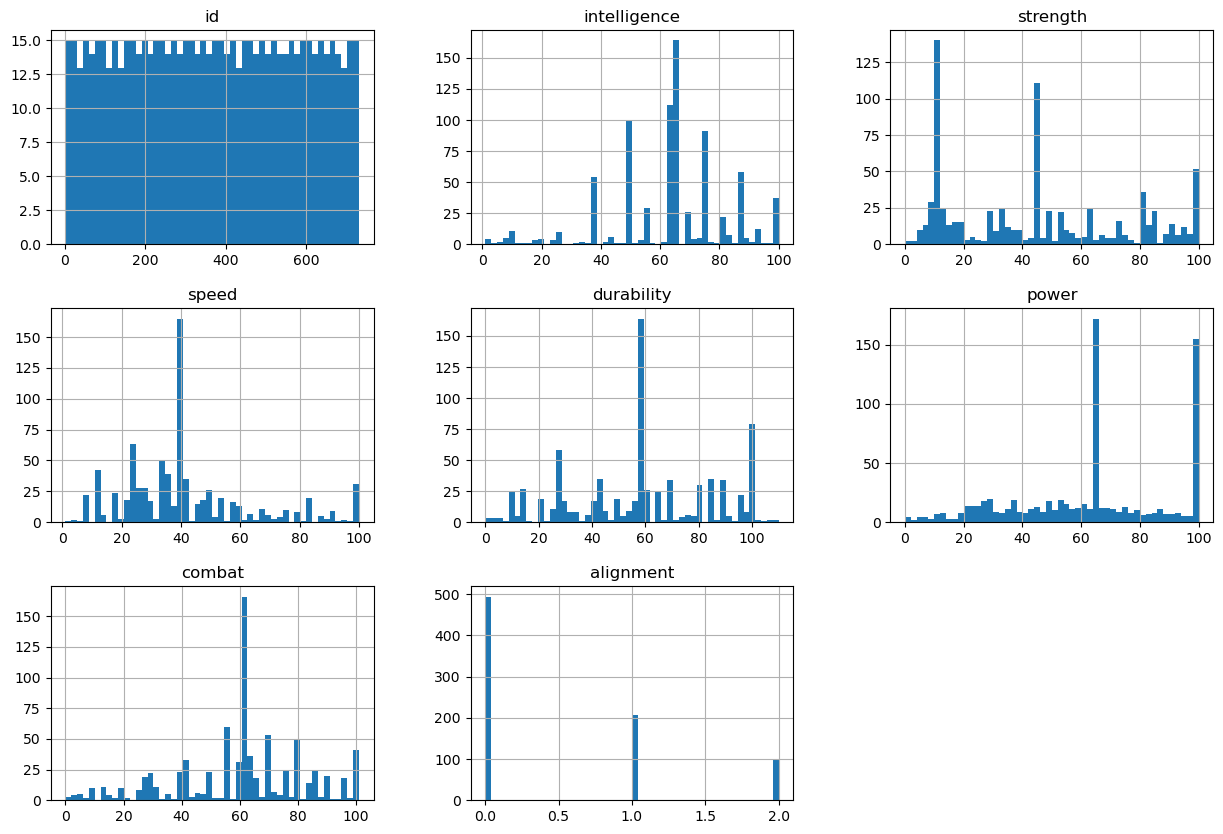

In [1114]:
df.hist(figsize = (15,10), bins = 50);

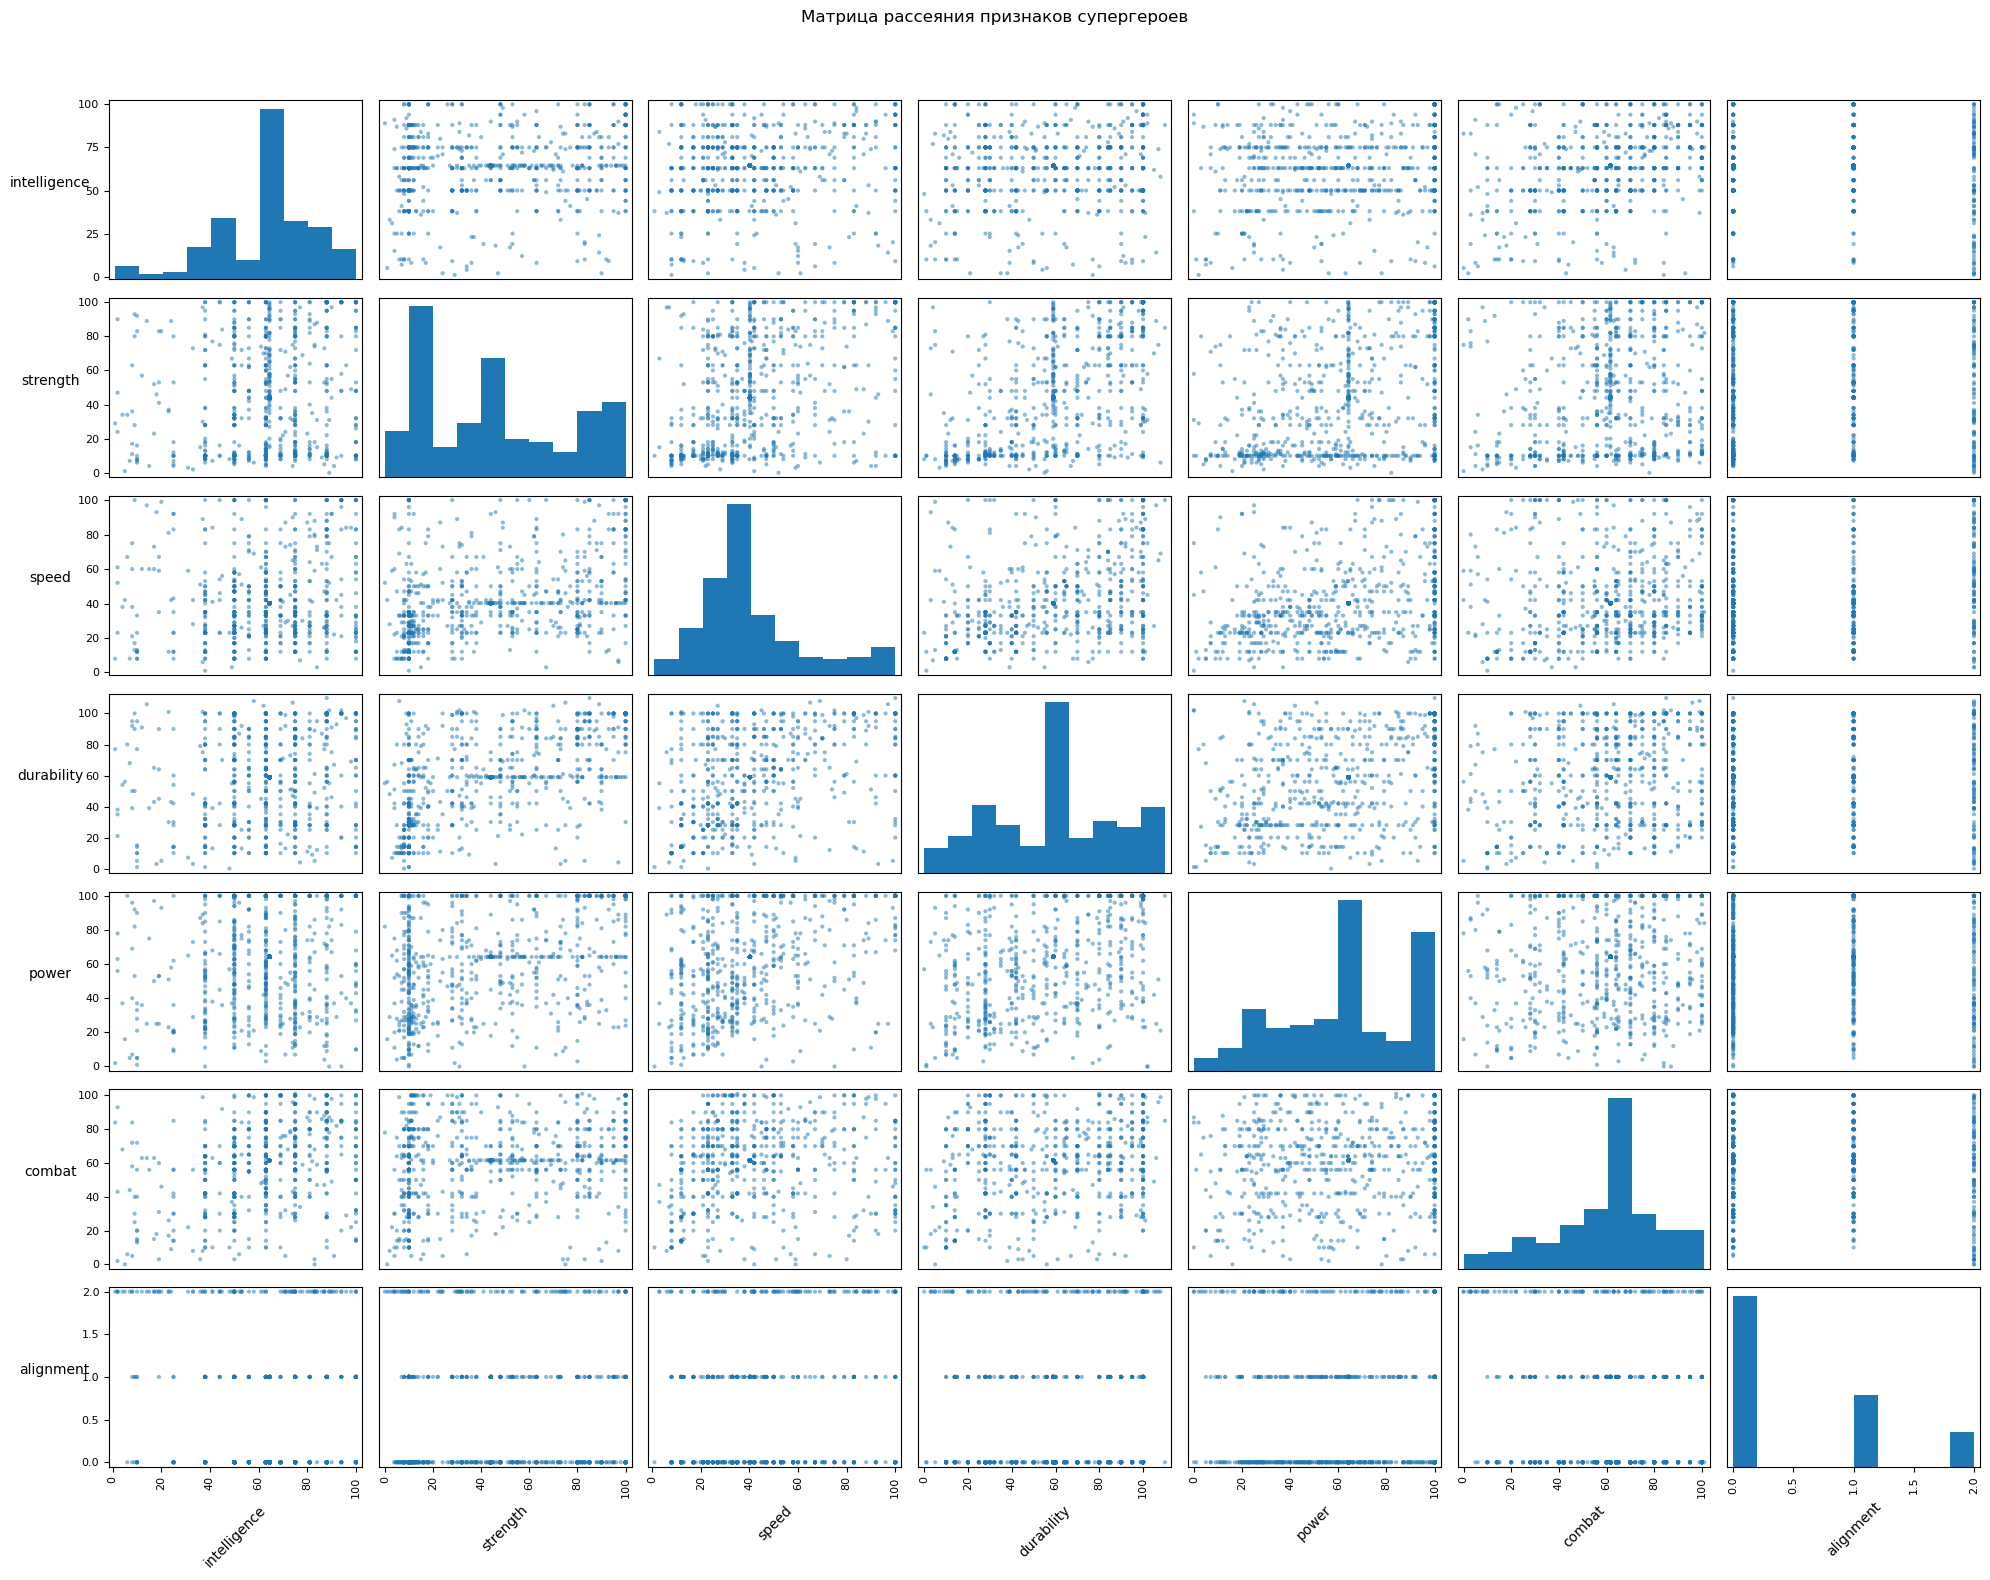

In [1115]:
from pandas.plotting import scatter_matrix

# Список столбцов для матрицы рассеяния
columns_to_plot = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat', 'alignment']

# Построение матрицы рассеяния
scatter_matrix(df[columns_to_plot], figsize=(20, 15), alpha=0.5)

# Поворот меток осей
for ax in plt.gcf().axes:
    ax.xaxis.label.set_rotation(45)  # Вертикальные метки для X
    ax.yaxis.label.set_rotation(0)    # Горизонтальные метки для Y
    ax.yaxis.labelpad = 20             # Увеличение расстояния между меткой и осью

# Использование tight_layout для предотвращения наложения
plt.tight_layout()

# Показать заголовок выше графиков
plt.suptitle("Матрица рассеяния признаков супергероев", y=1.05)  # y=1.05 поднимает заголовок выше

# Показать график
plt.show()

C:\Users\aniwe\AppData\Local\Temp\ipykernel_7540\1446045330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='alignment', data=df, palette='viridis')


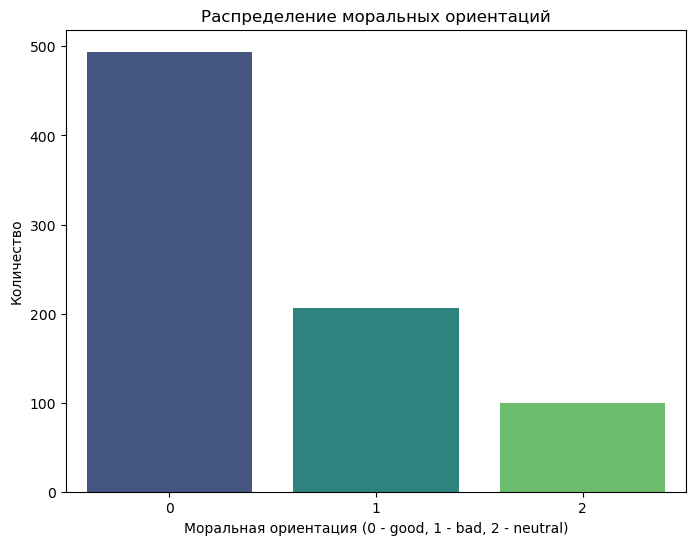

In [1116]:
plt.figure(figsize=(8, 6))
sns.countplot(x='alignment', data=df, palette='viridis')

# Добавление заголовка и меток осей
plt.title('Распределение моральных ориентаций')
plt.xlabel('Моральная ориентация (0 - good, 1 - bad, 2 - neutral)')
plt.ylabel('Количество')

# Показать график
plt.show()

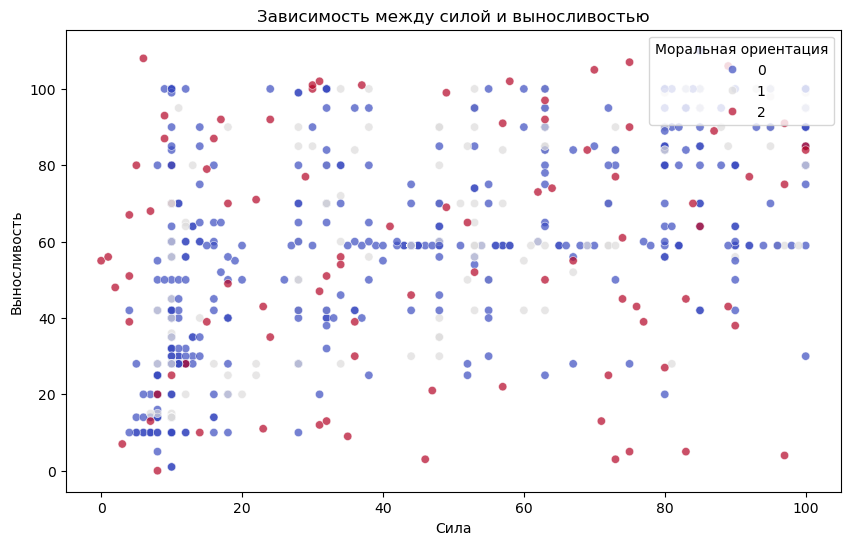

In [1117]:
# График зависимости между strength и durability
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['strength'], y=df['durability'], hue=df['alignment'], data=df, palette='coolwarm', alpha=0.7)
plt.title('Зависимость между силой и выносливостью')
plt.xlabel('Сила')
plt.ylabel('Выносливость')
plt.legend(title='Моральная ориентация', loc='upper right')
plt.show()

C:\Users\aniwe\AppData\Local\Temp\ipykernel_7540\1316137511.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['alignment'], y=df['speed'], data=df, palette='Set2')


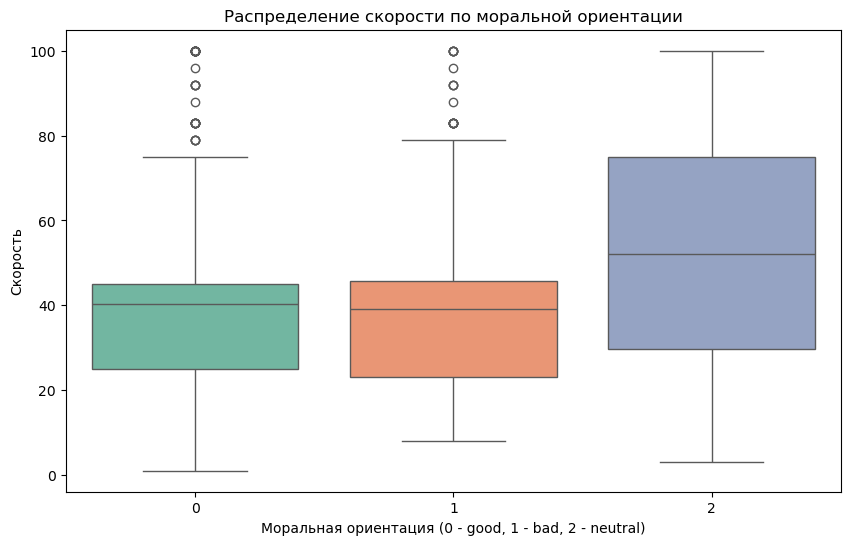

In [1118]:
# График распределения скорости по моральной ориентации
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['alignment'], y=df['speed'], data=df, palette='Set2')
plt.title('Распределение скорости по моральной ориентации')
plt.xlabel('Моральная ориентация (0 - good, 1 - bad, 2 - neutral)')
plt.ylabel('Скорость')
plt.show()

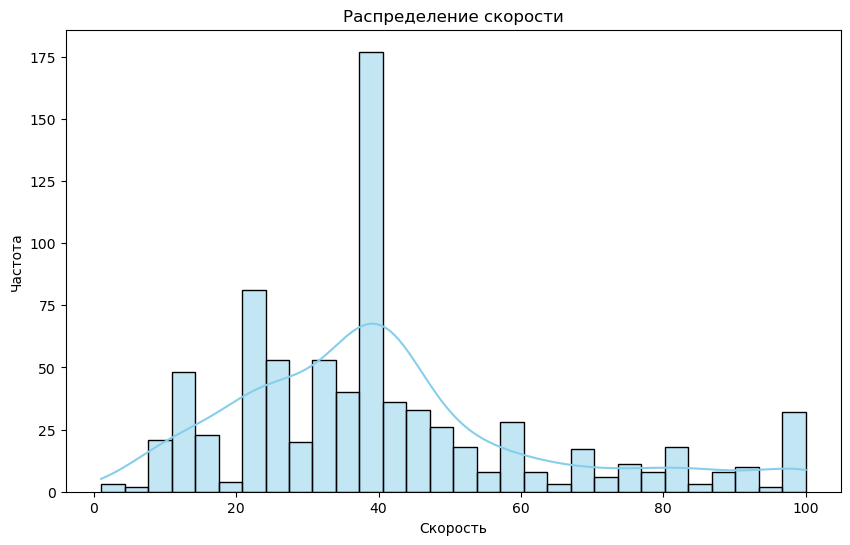

In [1119]:
# Гистограмма для speed
plt.figure(figsize=(10, 6))
sns.histplot(df['speed'], bins=30, kde=True, color='skyblue')
plt.title('Распределение скорости')
plt.xlabel('Скорость')
plt.ylabel('Частота')
plt.show()

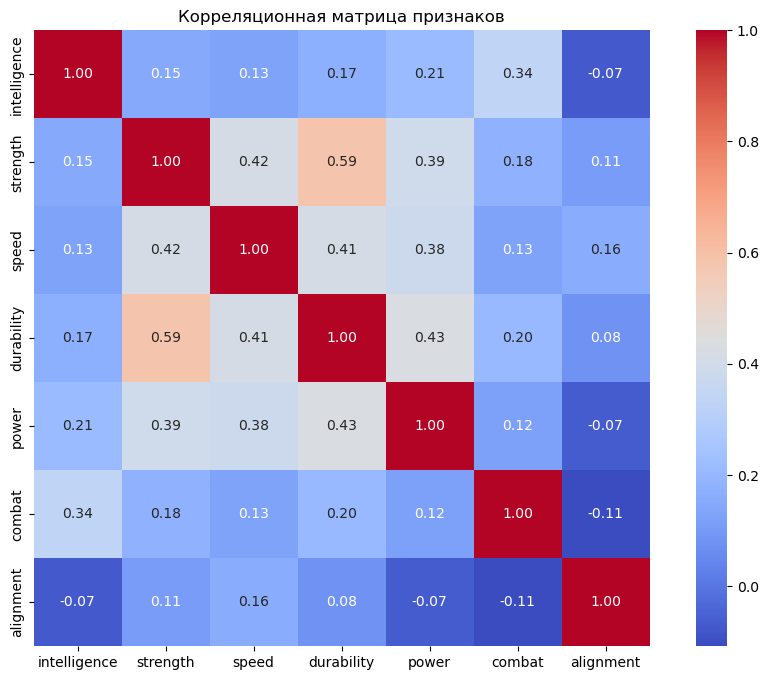

In [1120]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['intelligence', 'strength', 'speed', 'durability', 'power', 'combat', 'alignment']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Корреляционная матрица признаков")
plt.show()

C:\Users\aniwe\AppData\Local\Temp\ipykernel_7540\1723757779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='alignment', data=df, palette='viridis')


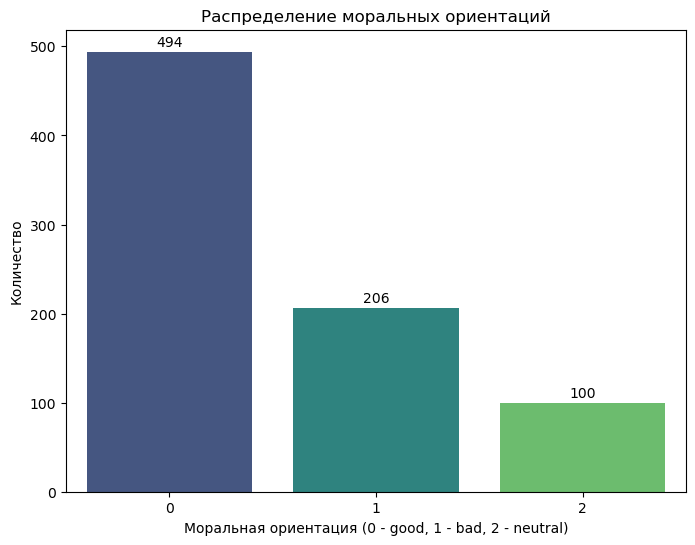

In [1121]:
plt.figure(figsize=(8, 6))
sns.countplot(x='alignment', data=df, palette='viridis')

# Добавление числовых значений на столбцах
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 3, f"{int(height)}", ha='center', va='bottom')

# Добавление заголовка и меток осей
plt.title('Распределение моральных ориентаций')
plt.xlabel('Моральная ориентация (0 - good, 1 - bad, 2 - neutral)')
plt.ylabel('Количество')

# Показать график
plt.show()

### Формирование дата-сета для обучения моделей

In [1122]:
#Шаг 2
# Список числовых столбцов
features_names = ['intelligence', 'strength', 'speed', 'durability', 'power', 'combat']

In [1123]:
# Признаки (X)
X = df[features_names]

In [1124]:
X

,intelligence,strength,speed,durability,power,combat
0,38.0,100.0,17.0,80.0,24.0,64.0
1,88.0,28.0,35.0,65.0,100.0,85.0
2,50.0,90.0,53.0,64.0,99.0,65.0
3,63.0,80.0,53.0,90.0,62.0,95.0
4,88.0,63.0,83.0,100.0,100.0,55.0
...,...,...,...,...,...,...
795,87.0,73.0,26.0,77.0,72.0,47.0
796,33.0,73.0,42.0,3.0,73.0,56.0
797,74.0,31.0,27.0,47.0,14.0,43.0
798,70.0,22.0,41.0,71.0,25.0,76.0


In [1125]:
# Целевая переменная (y)
y = df['alignment']

In [1126]:
print(df[features_names].describe())

       intelligence    strength       speed  durability       power  \
count    800.000000  800.000000  800.000000  800.000000  800.000000   
mean      63.231272   44.138951   41.429819   58.623317   62.429982   
std       19.503787   30.454084   22.207455   26.947769   26.786454   
min        1.000000    0.000000    1.000000    0.000000    0.000000   
25%       50.000000   12.000000   25.000000   40.000000   43.000000   
50%       64.445230   44.001590   40.249117   58.973498   64.243816   
75%       75.000000   70.000000   50.000000   80.000000   85.000000   
max      100.000000  100.000000  100.000000  110.000000  100.000000   

           combat  
count  800.000000  
mean    60.452420  
std     21.910005  
min      0.000000  
25%     50.000000  
50%     61.597173  
75%     75.000000  
max    101.000000  


### Обучение моделей (models fitting)

In [1127]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from imblearn.over_sampling import SMOTE

In [1128]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(536, 6) (264, 6) (536,) (264,)


In [1129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [1130]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Метод k-ближайших соседей

In [1131]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогнозирование (prediction)

In [1132]:
knn_predict = knn.predict(X_test)
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.6363636363636364

In [1133]:
confusion_matrix(knn_predict, y_test)

array([[148,  41,  24],
       [ 23,  14,   6],
       [  1,   1,   6]], dtype=int64)

In [1134]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77       213
           1       0.25      0.33      0.28        43
           2       0.17      0.75      0.27         8

    accuracy                           0.64       264
   macro avg       0.43      0.59      0.44       264
weighted avg       0.74      0.64      0.67       264



In [1135]:
knn_classification_rep = classification_report(y_test, knn_predict, output_dict=True)

# Сохранение результатов в переменную log
log = {
    'KNN': {
        'accuracy': knn_accuracy,
        'precision': knn_classification_rep['weighted avg']['precision'],
        'recall': knn_classification_rep['weighted avg']['recall'],
        'f1-score': knn_classification_rep['weighted avg']['f1-score'],
        'support': knn_classification_rep['weighted avg']['support']
    }
}

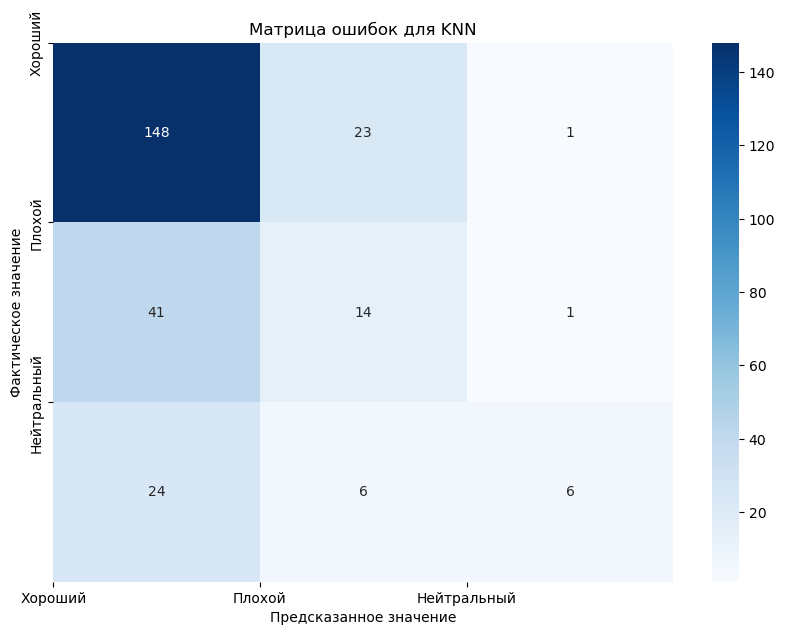

In [1136]:
# Визуализация матрицы ошибок для KNN
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для KNN')

# Добавление меток осей для трех классов
plt.xticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.yticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])

plt.show()

### Метод опорных векторов

In [1137]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [1138]:
svc_predict = svc.predict(X_test)

In [1139]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

0.696969696969697

In [1140]:
confusion_matrix(svc_predict, y_test)

array([[170,  49,  26],
       [  0,   4,   0],
       [  2,   3,  10]], dtype=int64)

In [1141]:
print(classification_report(svc_predict, y_test))

              precision    recall  f1-score   support

           0       0.99      0.69      0.82       245
           1       0.07      1.00      0.13         4
           2       0.28      0.67      0.39        15

    accuracy                           0.70       264
   macro avg       0.45      0.79      0.45       264
weighted avg       0.93      0.70      0.78       264



In [1142]:
svc_classification_rep = classification_report(y_test, svc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['SVC'] = {
    'accuracy': svc_accuracy,
    'precision': svc_classification_rep['weighted avg']['precision'],
    'recall': svc_classification_rep['weighted avg']['recall'],
    'f1-score': svc_classification_rep['weighted avg']['f1-score'],
    'support': svc_classification_rep['weighted avg']['support']
}

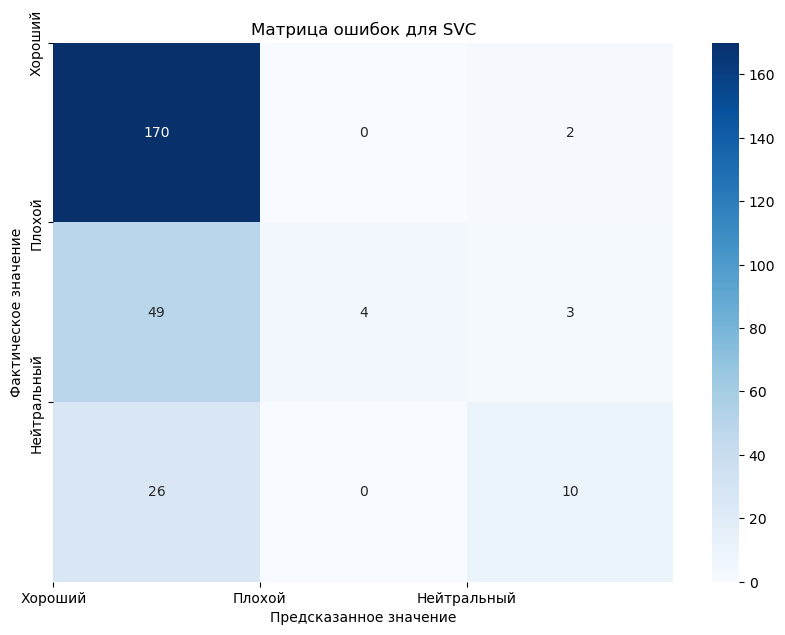

In [1143]:
# Визуализация матрицы ошибок для SVC
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для SVC')
plt.xticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.yticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.show()

### Классификатор дерева решений

In [1144]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [1145]:
dtc_predict = dtc.predict(X_test)

In [1146]:
dtc_accuracy = accuracy_score(dtc_predict, y_test)
dtc_accuracy

0.6401515151515151

In [1147]:
confusion_matrix(dtc_predict, y_test)

array([[138,  40,   9],
       [ 28,  12,   8],
       [  6,   4,  19]], dtype=int64)

In [1148]:
print(classification_report(dtc_predict, y_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       187
           1       0.21      0.25      0.23        48
           2       0.53      0.66      0.58        29

    accuracy                           0.64       264
   macro avg       0.51      0.55      0.53       264
weighted avg       0.67      0.64      0.65       264



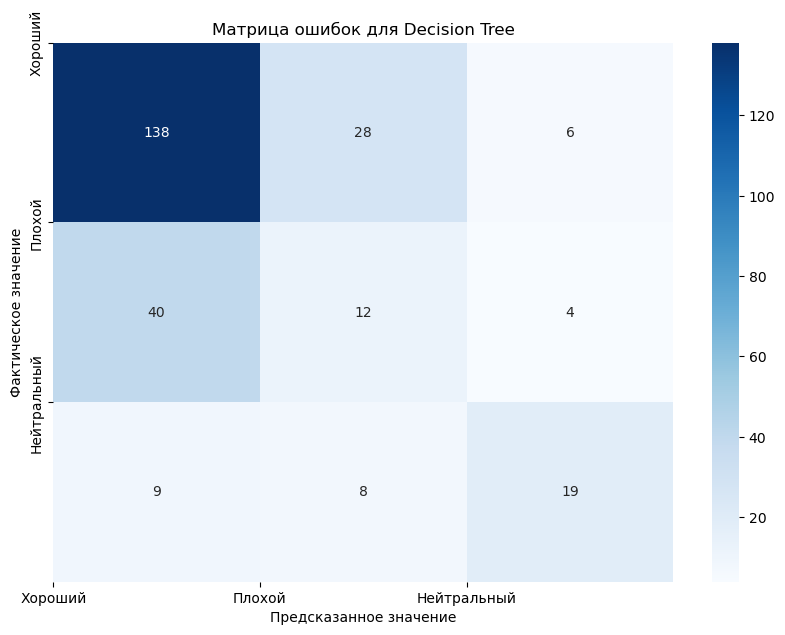

In [1149]:
# Визуализация Confusion Matrix для Decision Tree
dtc_conf_matrix = confusion_matrix(y_test, dtc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(dtc_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Decision Tree')
plt.xticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.yticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.show()

### RandomForestClassifier

In [1150]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [1151]:
rfc_predict = rfc.predict(X_test)

In [1152]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)
rfc_accuracy

0.7045454545454546

In [1153]:
confusion_matrix(rfc_predict, y_test)

array([[159,  44,  14],
       [ 13,   9,   4],
       [  0,   3,  18]], dtype=int64)

In [1154]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       0.92      0.73      0.82       217
           1       0.16      0.35      0.22        26
           2       0.50      0.86      0.63        21

    accuracy                           0.70       264
   macro avg       0.53      0.65      0.56       264
weighted avg       0.82      0.70      0.74       264



In [1155]:
rfc_classification_rep = classification_report(y_test, rfc_predict, output_dict=True)

# Сохранение результатов в переменную log
log['Random Forest'] = {
    'accuracy': rfc_accuracy,
    'precision': rfc_classification_rep['weighted avg']['precision'],
    'recall': rfc_classification_rep['weighted avg']['recall'],
    'f1-score': rfc_classification_rep['weighted avg']['f1-score'],
    'support': rfc_classification_rep['weighted avg']['support']
}

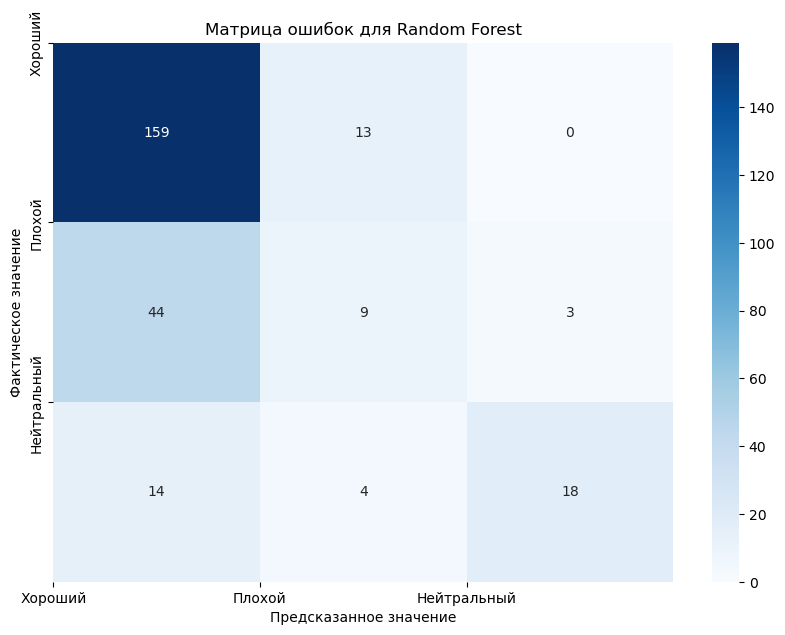

In [1156]:
# Визуализация Confusion Matrix для Random Forest
rfc_conf_matrix = confusion_matrix(y_test, rfc_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(rfc_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Random Forest')
plt.xticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.yticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.show()

### Наивный байесовский классификатор

In [1157]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [1158]:
gnb_predict = gnb.predict(X_test)

In [1159]:
gnb_accuracy = accuracy_score(gnb_predict, y_test)
gnb_accuracy

0.6704545454545454

In [1160]:
confusion_matrix(gnb_predict, y_test)

array([[152,  41,  19],
       [  4,   9,   1],
       [ 16,   6,  16]], dtype=int64)

In [1161]:
print(classification_report(gnb_predict, y_test)) 

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       212
           1       0.16      0.64      0.26        14
           2       0.44      0.42      0.43        38

    accuracy                           0.67       264
   macro avg       0.50      0.59      0.49       264
weighted avg       0.78      0.67      0.71       264



In [1162]:
gnb_classification_rep = classification_report(y_test, gnb_predict, output_dict=True)

# Сохранение результатов в переменную log
log['Gaussian Naive Bayes'] = {
    'accuracy': gnb_accuracy,
    'precision': gnb_classification_rep['weighted avg']['precision'],
    'recall': gnb_classification_rep['weighted avg']['recall'],
    'f1-score': gnb_classification_rep['weighted avg']['f1-score'],
    'support': gnb_classification_rep['weighted avg']['support']
}

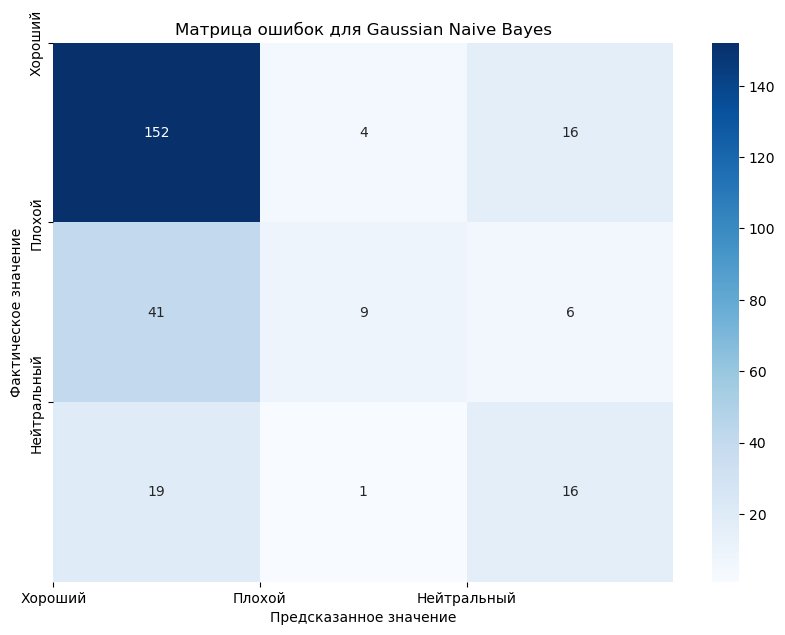

In [1163]:
# Визуализация Confusion Matrix для Gaussian Naive Bayes
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(gnb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Gaussian Naive Bayes')
plt.xticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.yticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.show()

### Логистическая регрессия

In [1164]:
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

C:\Users\aniwe\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1165]:
lrn_predict = lrn.predict(X_test)

In [1166]:
lrn_accuracy = accuracy_score(lrn_predict, y_test)
lrn_accuracy

0.6931818181818182

In [1167]:
confusion_matrix(lrn_predict, y_test)

array([[167,  50,  23],
       [  1,   5,   2],
       [  4,   1,  11]], dtype=int64)

In [1168]:
print(classification_report(lrn_predict, y_test))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       240
           1       0.09      0.62      0.16         8
           2       0.31      0.69      0.42        16

    accuracy                           0.69       264
   macro avg       0.46      0.67      0.46       264
weighted avg       0.90      0.69      0.77       264



In [1169]:
lrn_classification_rep = classification_report(y_test, lrn_predict, output_dict=True)

# Сохранение результатов в переменную log
log['Logistic Regression'] = {
    'accuracy': lrn_accuracy,
    'precision': lrn_classification_rep['weighted avg']['precision'],
    'recall': lrn_classification_rep['weighted avg']['recall'],
    'f1-score': lrn_classification_rep['weighted avg']['f1-score'],
    'support': lrn_classification_rep['weighted avg']['support']
}

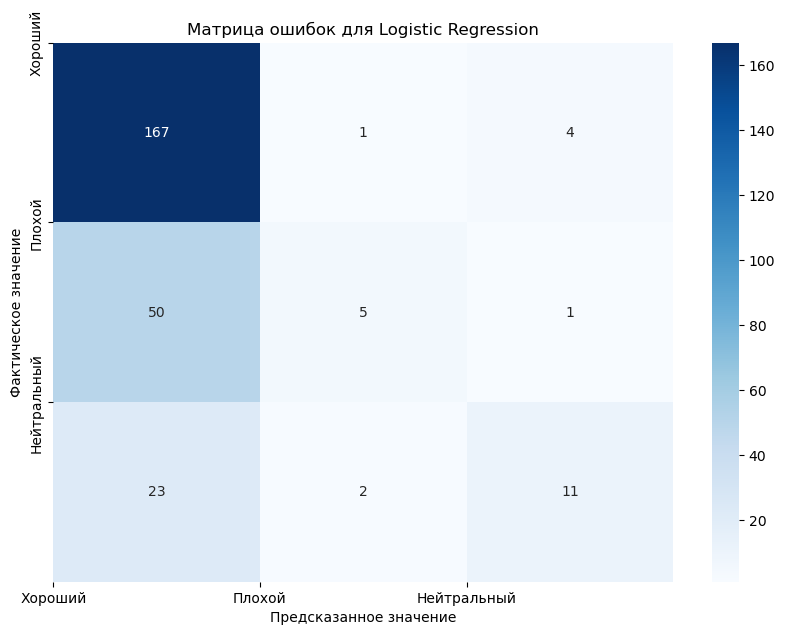

In [1170]:
# Визуализация Confusion Matrix для Logistic Regression
lrn_conf_matrix = confusion_matrix(y_test, lrn_predict)
plt.figure(figsize=(10, 7))
sns.heatmap(lrn_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Фактическое значение')
plt.xlabel('Предсказанное значение')
plt.title('Матрица ошибок для Logistic Regression')
plt.xticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.yticks([0, 1, 2], ['Хороший', 'Плохой', 'Нейтральный'])
plt.show()

### Сравнение моделей

In [1171]:
# Создаем DataFrame из логов
log_df = pd.DataFrame.from_dict(log, orient='index').reset_index()
log_df.rename(columns={'index': 'Model'}, inplace=True)

# Выводим таблицу с результатами
print("Сравнительная таблица результатов:")

Сравнительная таблица результатов:


In [1172]:
log_df

,Model,accuracy,precision,recall,f1-score,support
0,KNN,0.636364,0.624031,0.636364,0.598089,264.0
1,SVC,0.696970,0.755102,0.696970,0.612970,264.0
2,Random Forest,0.704545,0.667687,0.704545,0.665289,264.0
3,Gaussian Naive Bayes,0.670455,0.660904,0.670455,0.629296,264.0
4,Logistic Regression,0.693182,0.679672,0.693182,0.619006,264.0


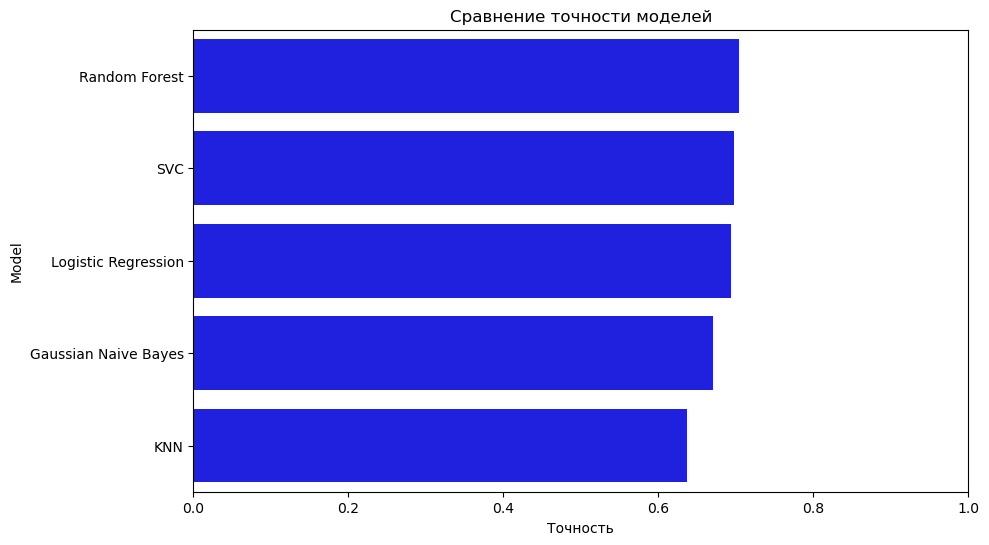

In [1174]:
# Строим график
plt.figure(figsize=(10, 6))
sns.barplot(x='accuracy', y='Model', data=log_df.sort_values(by='accuracy', ascending=False), color="b")

# Настраиваем график
plt.xlabel('Точность')
plt.title('Сравнение точности моделей')
plt.xlim(0, 1)  # Устанавливаем пределы по оси X от 0 до 1
plt.show()

###  Вывод о наилучшей модели для прогнозирования моральной ориентации супергероев
 Мы оценили несколько моделей машинного обучения для прогнозирования моральной ориентации супергероев на основе их характеристик, таких как интеллект, сила, скорость, выносливость, сила и боевые навыки. Целевая переменная содержала три класса: 0 (хороший), 1 (плохой) и 2 (нейтральный).

## Признаки, использованные для построения модели
## Список признаков:
## Интеллект (intelligence)
## Сила (strength)
## Скорость (speed)
## Выносливость (durability)
## Сила (power)
## Боевые навыки (combat)

### Анализ результатов
 Из таблицы видно, что наилучшие результаты по точности продемонстрировала модель Random Forest, которая показала значение точности 0.704545. Однако модель SVC имеет наивысшую точность и полноту для отдельных классов, что указывает на ее способность хорошо классифицировать определенные типы моральных ориентаций.

## Модель Logistic Regression также показала хорошие результаты, что делает ее приемлемым вариантом для использования.

## Модель KNN имеет умеренные показатели, но не столь эффективна, как Random Forest или SVC.

## Наименее эффективной моделью оказалась Gaussian Naive Bayes, которая показала наименьшую точность среди всех моделей.

### Рекомендации
 На основании проведенного анализа можно использовать модель Random Forest или SVC для прогнозирования моральной ориентации супергероев в зависимости от конкретных требований и приоритетов метрик. Модель Random Forest обеспечивает наилучшую общую точность, а модель SVC — наивысшую точность и полноту для отдельных классов.